En esta celda escribe tu **nombre** y tu **programa** (ESCOM, MCC, MCIC o DCC)
ADEBANJI OLARONKE OLUWAYEMISI Y MCC

Salary analysis between men and women

Suppose we work as data scientists in a company and we are given a set of data on the salaries between men and women in the company.

With this set of data we are asked to answer what is the pay gap between men and women in the company?

preliminaries
Import the necessary modules/packages.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from tqdm import tqdm

Definition of auxiliary functions used.

In [35]:
def generate_data(**kwargs):
  raise NotImplementedError

def read_data(**kwargs):
  csv_filename = kwargs["csv_filename"]
  return pd.read_csv(csv_filename, index_col=0)

The ENV variable must have value "HW" when in task mode.

In [36]:
ENV = "HW"

In [37]:
get_data = read_data if ENV == "HW" else generate_data

Beginning

Read the data from the ex_01_wages.csv file with the read_data function defined above.

In [38]:
kwargs = {
    "csv_filename": "https://raw.githubusercontent.com/ccaballeroh/InferenciaCausal_A22/main/data/ex_01_wages.csv"
}

data = get_data(**kwargs)

if not ENV == "HW":
  data.to_csv("ex_01_wages.csv")

Exploratory data analysis

Let's look at the first few lines of the dataset stored in the DataFrame named data.

In [39]:
data.head()

,sexo,puesto,salario
index,,,
0,Hombre,No gerencial,24092.767040
1,Mujer,No gerencial,25574.011864
2,Hombre,Gerencial,39051.930008
3,Mujer,No gerencial,26058.226921
4,Hombre,Gerencial,44688.832593


Prints the data type of the data columns.

In [40]:
data.dtypes

sexo        object
puesto      object
salario    float64
dtype: object

Prints the summary of the data set.

In [41]:
data.describe(include=['object', 'float', 'int'])

,sexo,puesto,salario
count,200,200,200.000000
unique,2,2,NaN
top,Mujer,No gerencial,NaN
freq,105,146,NaN
mean,NaN,NaN,35155.418105
std,NaN,NaN,8506.795221
min,NaN,NaN,17037.452191
25%,NaN,NaN,28699.515533
50%,NaN,NaN,33567.270374
75%,NaN,NaN,40003.413391


Make a box plot of salary by sex.

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


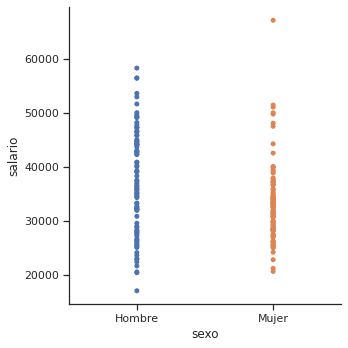

In [43]:
sns.catplot(x="sexo", y="salario", jitter=False, data=data)

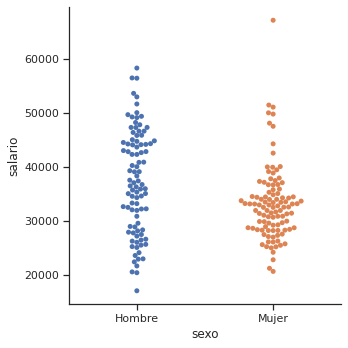

In [44]:
sns.catplot(x="sexo", y="salario", kind="swarm", data=data)

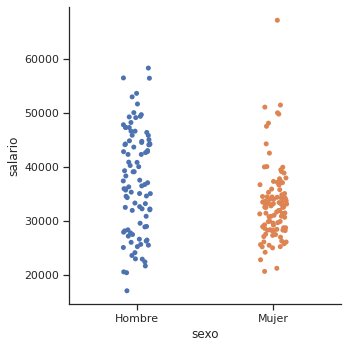

In [45]:
sns.catplot(x="sexo", y="salario", data=data)

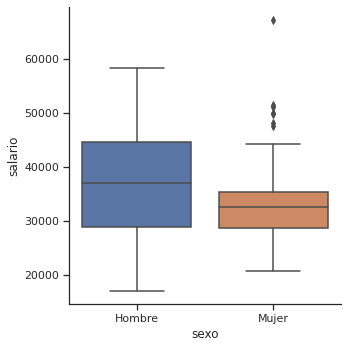

In [46]:
sns.catplot(x="sexo", y="salario", kind="box", data=data)

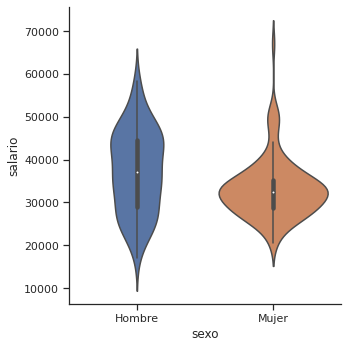

In [47]:
sns.catplot(x="sexo", y="salario", kind="violin", data=data)

What do you think about whether or not there is a salary difference between men and women?

There is a salary disparity between men and women, with the women's compensation increasing to 30,000 at the 30000 level.

Now, make a boxplot of salary by sex separating by the third variable position.

Did your opinion change? Is there a difference between men and women comparing for the same type of position?

**Your answer:**Yes

Now, make a categorical swarm plot using Seaborn's catplot. On the X axis, place the position; in the ye, salary and separated by sex.

Is there a big difference in salary between managers and non-managers?

**Your answer:**

Now make the same graph, but reverse the variables for the X's and Hue.

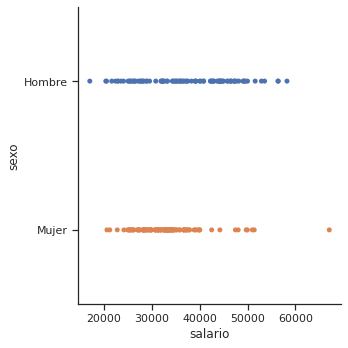

In [48]:
sns.catplot(x="salario", y="sexo", jitter=False, data=data)

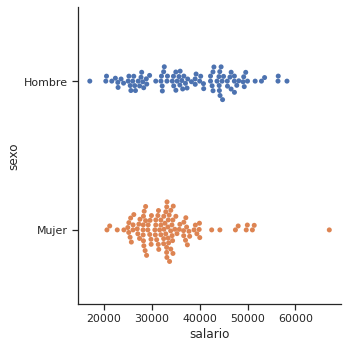

In [49]:
sns.catplot(x="salario", y="sexo", kind="swarm", data=data)

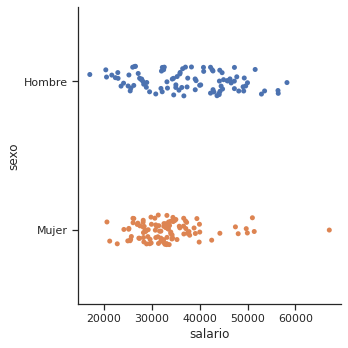

In [50]:
sns.catplot(x="salario", y="sexo", data=data)

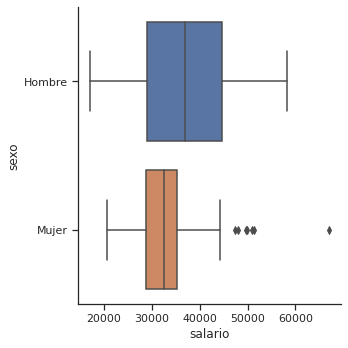

In [51]:
sns.catplot(x="salario", y="sexo", kind="box", data=data)

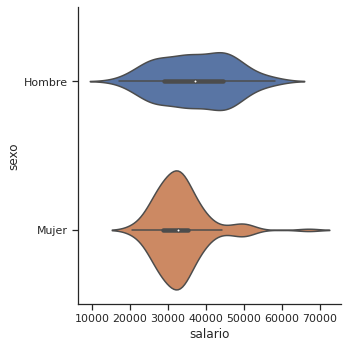

In [52]:
sns.catplot(x="salario", y="sexo", kind="violin", data=data)

Are there more or fewer women than men in high positions? And in lower positions? YES

Generate a contingency table for the average salary and another for the total number of people in each combination of categories.

In [53]:
# Use Pandas' `crosstab` with Numpy's `mean` aggregation function

In [54]:
# It uses `crosstab` from Pandas. Pass `True` to the `margins` parameter

In [55]:
pd.crosstab(index=data['sexo'], columns=data['salario'], margins=True)


salario,17037.452191203476,20381.554170293864,20531.0713326612,20622.129879559983,21197.03374417802,21631.9451256776,22384.60141036437,22775.43657050547,22890.6627157468,22947.06682502818,23568.881771121716,24092.767040475184,24163.79467227777,24978.007175822226,25047.47384977788,25172.10038369488,25201.19566236611,25212.34724987034,25458.14259483861,25482.94044116247,25574.011864094344,25624.965009012438,25722.25489457621,26002.66812922084,26058.226921081183,26077.6867680588,26228.169218633186,26238.267064305703,26421.162119920817,26581.209169510345,26958.95087495947,27072.973932329154,27154.39592589807,27288.95684584708,27435.47972116786,27448.25814394068,27523.34244718973,27744.894606334088,27880.36279642263,28119.2150418232,...,43626.5312360942,44035.50025986953,44076.36205432238,44124.24370172522,44201.08924380567,44225.65126621546,44258.88528083556,44480.39111426405,44688.83259328529,44784.81267222071,44993.7020506554,45778.30167439615,45816.60612315243,46333.32213582349,46572.38052689664,46579.39269519893,47248.40285237016,47258.1418144504,47268.634244782166,47473.31724952278,47756.96123485081,48050.61657747651,48174.18586672904,49079.31801839443,49202.94922849183,49320.59173801954,49625.92557462914,49732.17868157957,49964.70075877853,49997.30724521472,51020.62412493283,51404.36427177198,51599.677823048376,52915.052106560965,53568.11623581925,56370.33652195719,56420.95906927712,58247.40743875952,67095.39595813795,All
sexo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Hombre,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,1,...,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,0,95
Mujer,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,105
All,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,200


In [56]:
ronke = pd.crosstab(index=data['salario'], columns=data['sexo'], margins=True)
ronke

sexo,Hombre,Mujer,All
salario,,,
17037.452191203476,1,0,1
20381.554170293864,1,0,1
20531.0713326612,1,0,1
20622.129879559983,0,1,1
21197.03374417802,0,1,1
...,...,...,...
56370.33652195719,1,0,1
56420.95906927712,1,0,1
58247.40743875952,1,0,1


In [57]:
#Analysis question
#For this data set, we are asked to determine the pay gap between men and women in the company where this data was collected.

#Before continuing, use the contingency tables above to try to answer the question.

In [58]:
#**Your answer:**

In [59]:
#Guided Analysis
#1. Calculate the average salary of women and men
#Calculate the average salary of women
#Calculate the average salary of men
#make the difference
#Who earns more?

## Analysis question

For this data set, we are asked to determine the pay gap between men and women in the company where this data was collected.

- Before continuing, use the previous contingency tables to try to answer the question.

Your answer:

Guided Analysis

1. Calculate the average salary of women and men
Calculate the average salary of women
Calculate the average salary of men
make the difference
Who earns more?

In [60]:
data.mean(axis=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


salario    35155.418105
dtype: float64

In [61]:
data.mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


index
0      24092.767040
1      25574.011864
2      39051.930008
3      26058.226921
4      44688.832593
           ...     
195    33271.374137
196    40020.748931
197    28598.379301
198    53568.116236
199    33179.593958
Length: 200, dtype: float64

In [62]:
entire_data= data.mean()
print(entire_data)


salario    35155.418105
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [63]:
entire_dataframe = data.mean()
print(entire_dataframe)

salario    35155.418105
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [64]:
## your code

average_women = 0.0
average_men = 0.0

##

#printf"""
#Women earn on average: ${average women:,.2f}
#Men earn on average: ${average_men:,.2f}
#The difference is ${average_women - average_men:,.2f}
#""")

2. Now compare by strata
Compare by post category separately.

Now, what is the salary difference in each category?

Who earns more in each type of position?

[ ]

In [65]:
data.head()

,sexo,puesto,salario
index,,,
0,Hombre,No gerencial,24092.767040
1,Mujer,No gerencial,25574.011864
2,Hombre,Gerencial,39051.930008
3,Mujer,No gerencial,26058.226921
4,Hombre,Gerencial,44688.832593


Optional
Make a weighted sum by the number of managers of the above differences.

Reflection
What do you think is happening? How is it possible that when looking at each type of position the difference favors one sex, but when looking at the entire population the preference is reversed?
If the data labels were lifestyle instead of gender, job title, and salary, would that change your answer?

Your answer:

#Statistical analysis of mean differences

Do a linear regression salary ~ sex.

Compare the coefficient (slope) of the categorical variable sex with the result you had obtained above.

Are the differences (statistically) significant?

Your answer:

Do a linear regression salary ~ gender + position.

Now, compare the coefficient (slope) of the categorical variable sex with the weighted result that you had obtained above (it may not be exactly the same).

Are the differences (statistically) significant?

Your answer:

#Analysis with Bootstrap

Analyze the following code to answer the following questions:

What does the estimate_statistic function return?
What does line 10 of the code in the next cell do?
Compare the value of the variable mean_difference with the results obtained in the previous sections.
How is the interval [LL,UU] interpreted?
How many elements does the bootstrap_statistcs array have and why does its histogram tend to a normal distribution?


** Your answer:**

In [68]:
def estimate_statistic(bootstrap_sample):
  return smf.ols("salario ~ sexo", data=bootstrap_sample).fit().params[1]


N_bootstraps = 10_000
bootstrap_statistics = []


for _ in tqdm(range(N_bootstraps)):
  bootstrap_sample = data.sample(n=len(data), replace=True)
  statistic = estimate_statistic(bootstrap_sample)
  bootstrap_statistics.append(statistic)

bootstrap_statistics = np.array(bootstrap_statistics)
mean_difference = np.mean(bootstrap_statistics)
LL, UU = np.quantile(bootstrap_statistics, 0.025), np.quantile(bootstrap_statistics, 0.975)

100%|██████████| 10000/10000 [00:55<00:00, 181.56it/s]


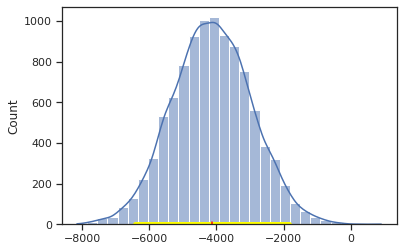

In [69]:
plt.plot([LL, UU], [0, 0], color="yellow", lw=5)
plt.plot([mean_difference, mean_difference], [0, 10], color="red")
sns.histplot(data=bootstrap_statistics, bins=30, kde=True)

In [70]:
print(f"""
The value estimated by resampling with replacement is ${mean_difference:,.2f}.
With a bootstrap confidence interval of [${LL:,.2f}, {UU:,.2f}] at 95%.
""")


The value estimated by resampling with replacement is $-4,135.18.
With a bootstrap confidence interval of [$-6,419.43, -1,831.50] at 95%.

